In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_excel("Flight_Train.xlsx")

# Feature Engineering

In [3]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

# Handling missing value 

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Handling Duplicate records 

In [8]:
duplicate = df.duplicated()
duplicate

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Length: 10682, dtype: bool

In [9]:
duplicate.sum()

220

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
duplicate = df.duplicated()
duplicate

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Length: 10462, dtype: bool

In [12]:
duplicate.sum()

0

# Handling Outlier 

In [13]:
#Quantity outlier check
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)
IQR=Q3-Q1

In [14]:
Q1

5224.0

In [15]:
Q3

12344.75

In [16]:
IQR

7120.75

In [17]:
#Quantity outlier removed
df=df[~((df['Price']>Q3+1.5*IQR)|(df['Price']<Q1-1.5*IQR))]

# Data Visualization

In [18]:
# Show the frequency of each Airlines
for index, value in df['Airline'].value_counts().iteritems():
    print(index, ': ', value)

Jet Airways :  3638
IndiGo :  2043
Air India :  1679
Multiple carriers :  1186
SpiceJet :  814
Vistara :  478
Air Asia :  319
GoAir :  194
Multiple carriers Premium economy :  13
Vistara Premium economy :  3
Trujet :  1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Trujet')])

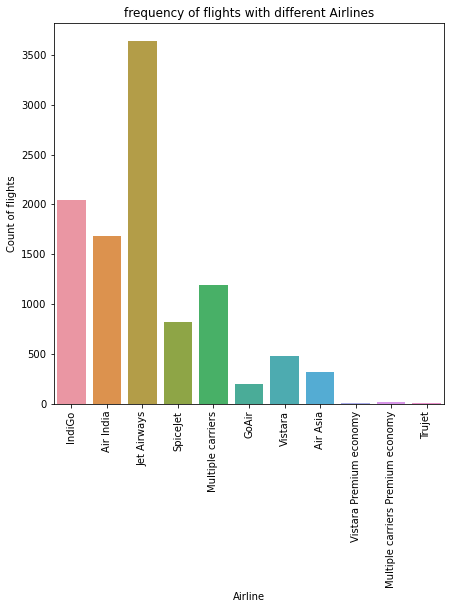

In [19]:
#Count of flights v/s Airline
plt.figure(figsize = (7, 7))
plt.title('frequency of flights with different Airlines')
ax1=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

In [20]:
# Show the frequency of each Destination
for index, value in df['Destination'].value_counts().iteritems():
    print(index, ': ', value)

Cochin :  4329
Banglore :  2859
Delhi :  1265
New Delhi :  842
Hyderabad :  692
Kolkata :  381


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

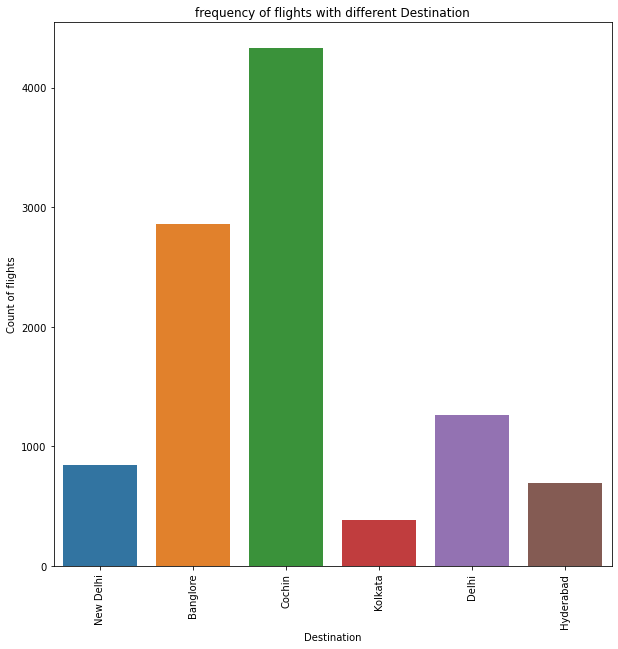

In [21]:
#frequency of flights v/s Destination
plt.figure(figsize = (10, 10))
plt.title('frequency of flights with different Destination')
ax2=sns.countplot(x = 'Destination', data =df)
plt.xlabel('Destination')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

In [22]:
# Show the frequency of each Source
for index, value in df['Source'].value_counts().iteritems():
    print(index, ': ', value)

Delhi :  4329
Kolkata :  2859
Banglore :  2107
Mumbai :  692
Chennai :  381


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

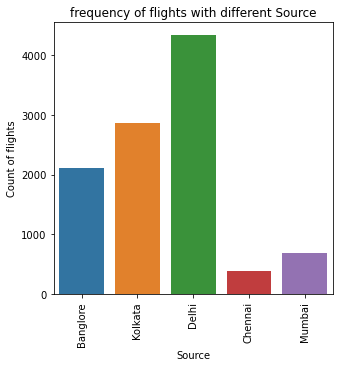

In [23]:
#frequency of flights v/s Source
plt.figure(figsize = (5, 5))
plt.title('frequency of flights with different Source')
ax2=sns.countplot(x = 'Source', data =df)
plt.xlabel('Source')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

In [24]:
# Show the frequency of each Stop
for index, value in df['Total_Stops'].value_counts().iteritems():
    print(index, ': ', value)

1 stop :  5550
non-stop :  3472
2 stops :  1302
3 stops :  43
4 stops :  1


Text(0, 0.5, 'Count of flights')

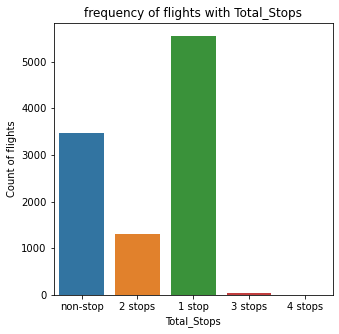

In [25]:
#frequency of flights v/s Total_Total_Stopss
plt.figure(figsize = (5, 5))
plt.title('frequency of flights with Total_Stops')
ax2=sns.countplot(x = 'Total_Stops', data =df)
plt.xlabel('Total_Stops')
plt.ylabel('Count of flights')

In [26]:
# Show the frequency of each Additional Info
for index, value in df['Additional_Info'].value_counts().iteritems():
    print(index, ': ', value)

No info :  8105
In-flight meal not included :  1926
No check-in baggage included :  318
1 Long layover :  9
Change airports :  6
No Info :  3
Red-eye flight :  1


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, 'No Info'),
  Text(4, 0, '1 Long layover'),
  Text(5, 0, 'Change airports'),
  Text(6, 0, 'Red-eye flight')])

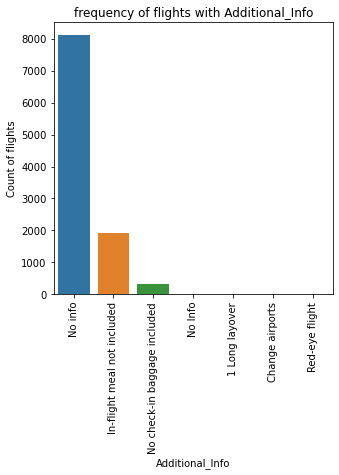

In [27]:
#frequency of flights v/s Additional_Info
plt.figure(figsize = (5, 5))
plt.title('frequency of flights with Additional_Info')
ax4=sns.countplot(x = 'Additional_Info', data =df)
plt.xlabel('Additional_Info')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

In [28]:
# Show the frequency of each Dep_Time
for index, value in df['Dep_Time'].value_counts().iteritems():
    print(index, ': ', value)

18:55 :  233
17:00 :  225
07:05 :  202
07:10 :  201
10:00 :  196
20:00 :  185
09:00 :  184
09:35 :  181
21:10 :  178
13:00 :  164
07:00 :  159
10:20 :  158
14:05 :  158
11:30 :  157
11:40 :  155
08:00 :  150
06:30 :  139
08:25 :  136
09:45 :  136
06:00 :  130
20:25 :  125
17:45 :  118
08:20 :  114
05:45 :  112
16:30 :  109
22:50 :  103
05:30 :  102
16:55 :  101
16:00 :  100
12:00 :  98
07:30 :  95
19:35 :  94
15:15 :  91
17:30 :  90
19:45 :  89
09:25 :  84
17:15 :  83
19:30 :  83
02:15 :  80
20:20 :  79
20:55 :  78
05:50 :  77
13:15 :  76
05:55 :  76
08:45 :  75
04:55 :  73
21:25 :  73
15:00 :  72
07:35 :  72
11:10 :  71
14:00 :  71
06:40 :  71
22:20 :  70
06:50 :  70
09:30 :  68
08:30 :  68
18:15 :  66
21:50 :  66
06:55 :  66
09:40 :  64
17:10 :  63
10:35 :  63
16:45 :  62
21:05 :  61
07:55 :  59
19:00 :  58
09:10 :  57
14:25 :  56
23:30 :  55
05:15 :  54
13:20 :  53
06:05 :  53
19:15 :  51
20:30 :  49
06:20 :  48
13:55 :  48
04:00 :  47
08:55 :  46
02:55 :  46
11:35 :  45
21:00 :  44

<function matplotlib.pyplot.show(close=None, block=None)>

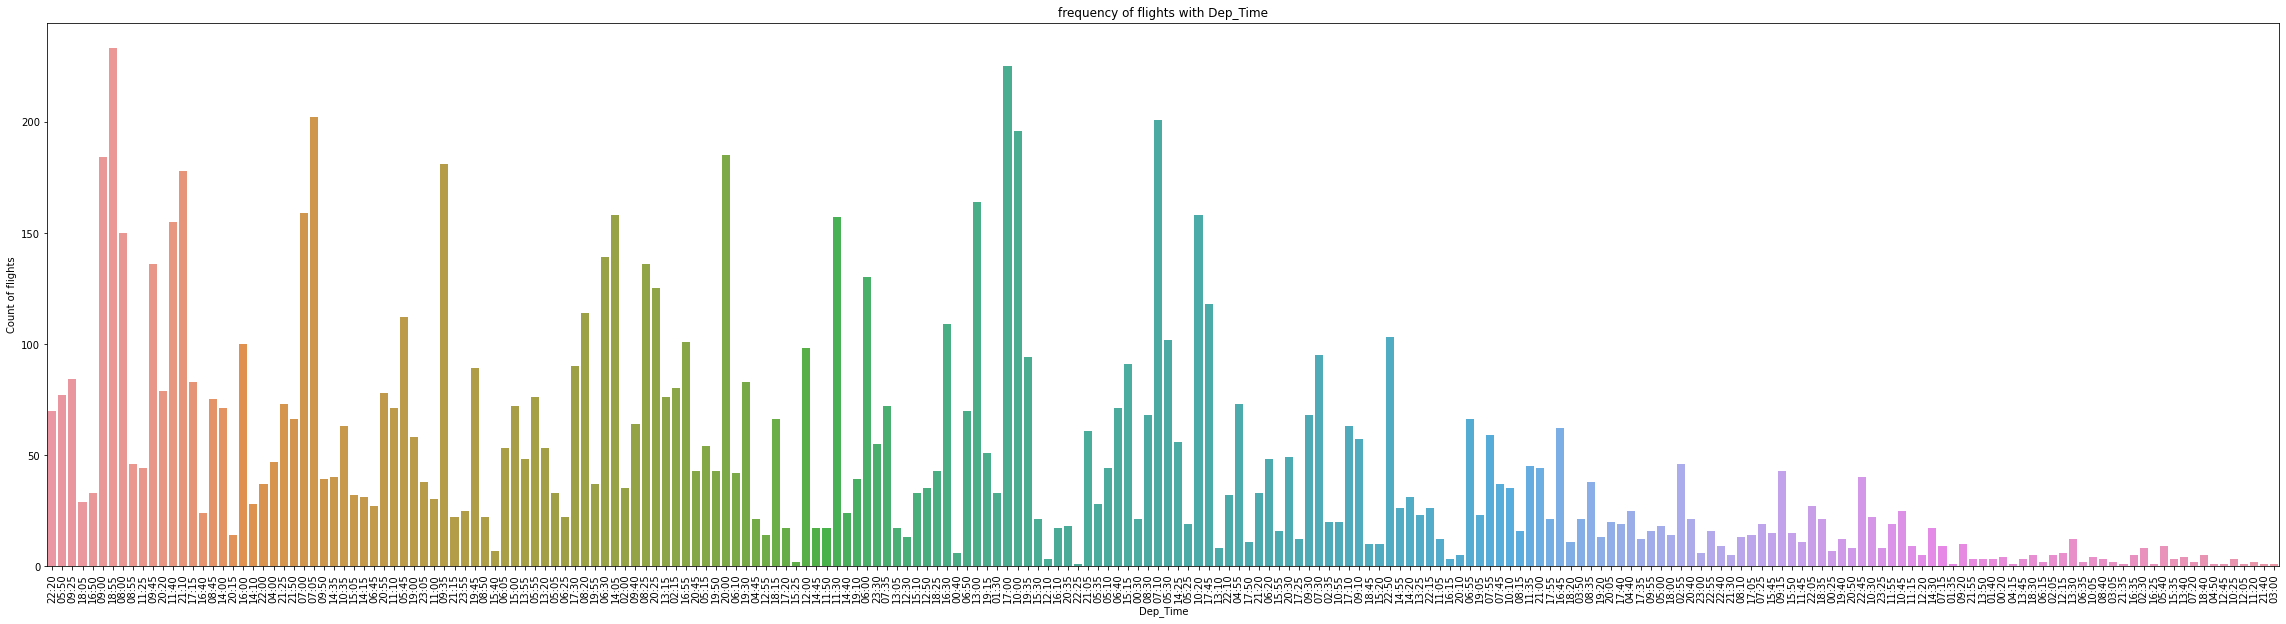

In [29]:
#frequency of flights v/s Dep_Time
plt.figure(figsize = (40, 10))
plt.title('frequency of flights with Dep_Time')
ax4=sns.countplot(x = 'Dep_Time', data =df)
plt.xlabel('Dep_Time')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
plt.show

# Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

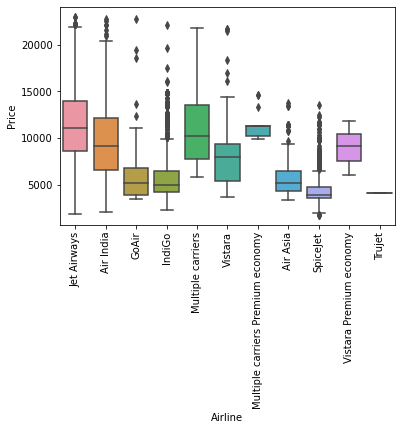

In [30]:
# Airline vs Price
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

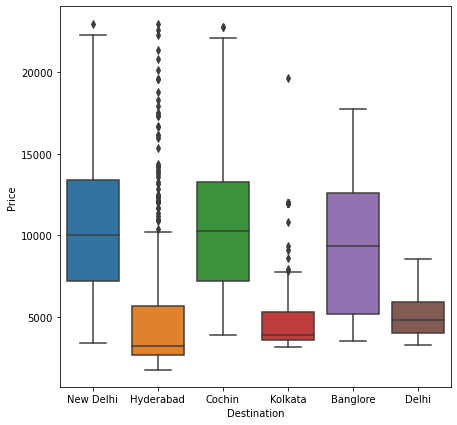

In [31]:
# Destination vs Price
plt.figure(figsize = (7, 7))
sns.boxplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

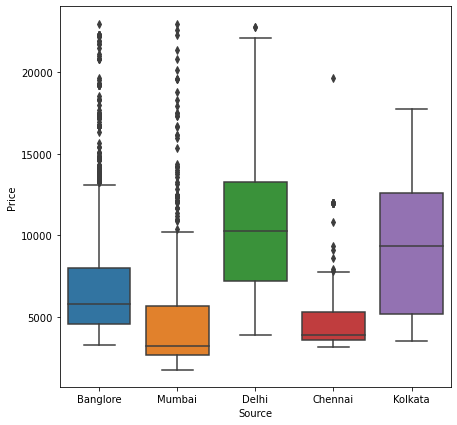

In [32]:
# Source vs Price
plt.figure(figsize = (7, 7))
sns.boxplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

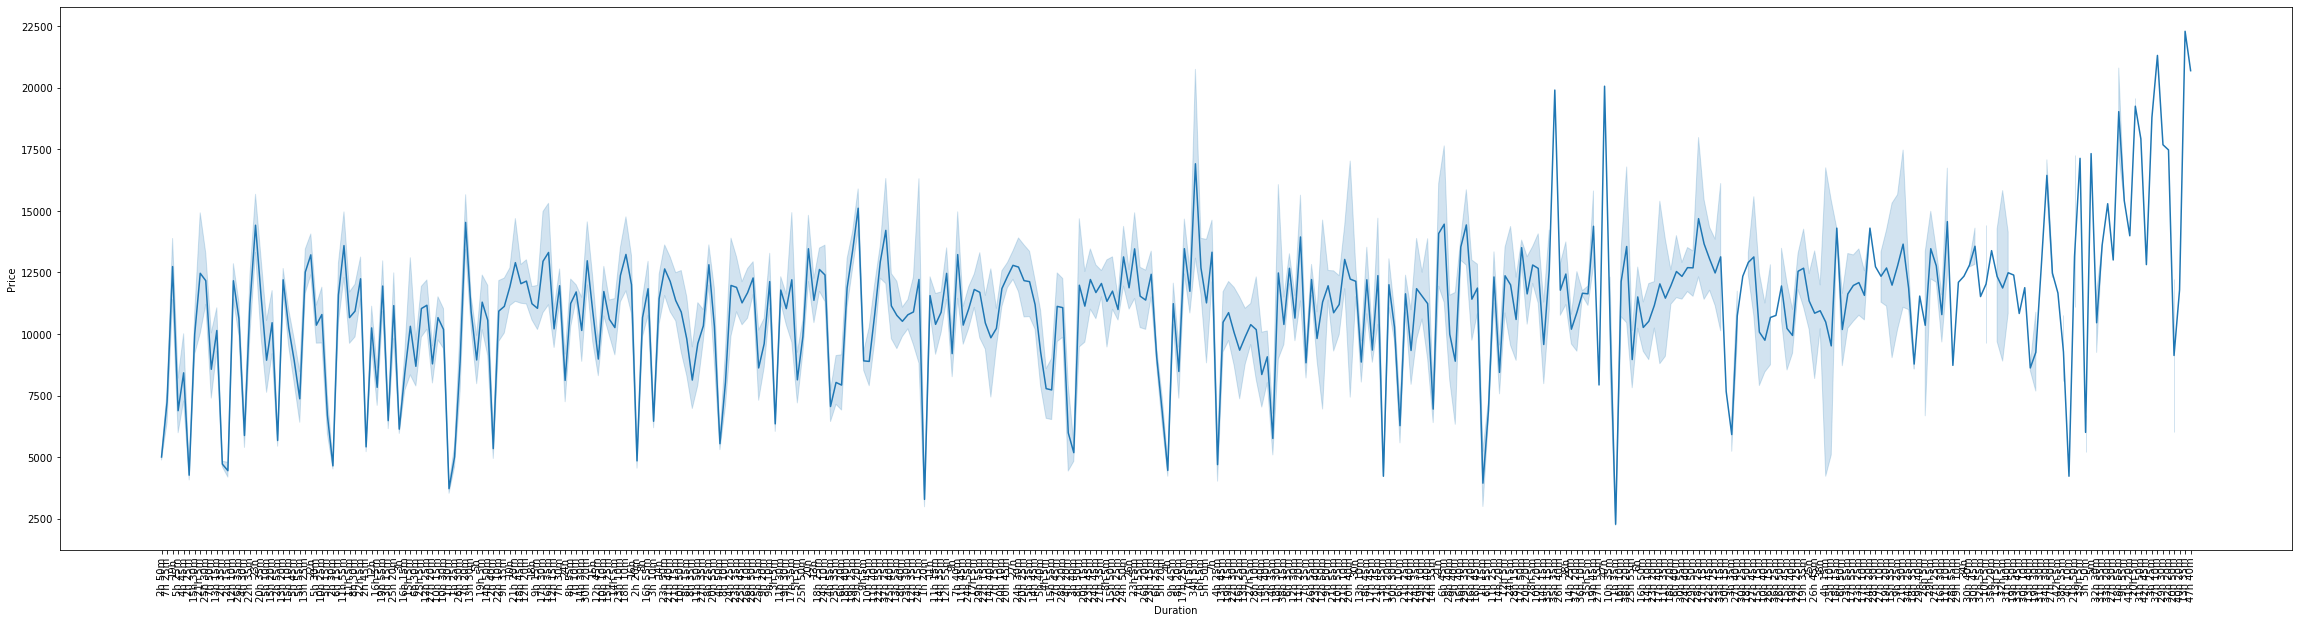

In [33]:
#duration v/s Price
plt.figure(figsize = (40, 10))
sns.lineplot(data=df, x='Duration', y='Price')
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

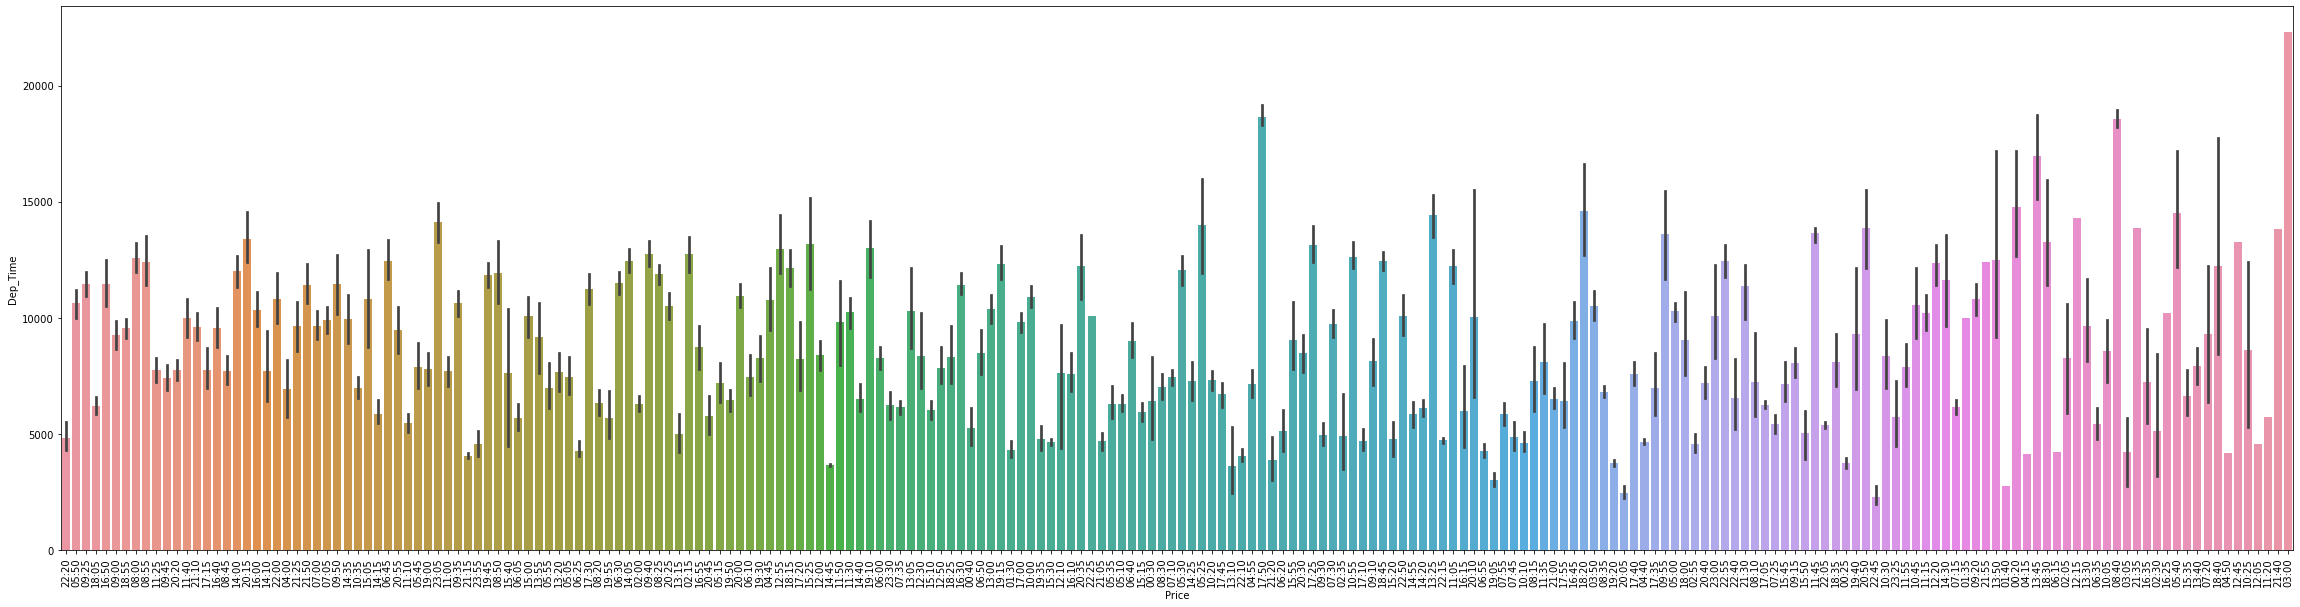

In [34]:
#Deptarure time v/s Price
plt.figure(figsize = (40, 10))
v2=sns.barplot(x='Dep_Time', y='Price', data=df)
v2.set_ylabel('Dep_Time')
v2.set_xlabel('Price')
plt.xticks(rotation = 90)
plt.show

Text(0.5, 0, 'Total_Stops')

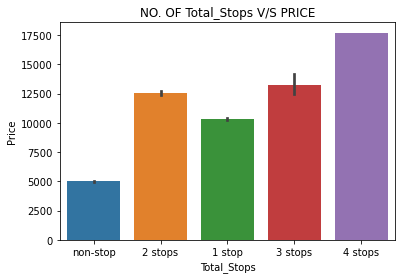

In [35]:
v4=sns.barplot(x='Total_Stops', y='Price', data=df)
v4.set_title('NO. OF Total_Stops V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')

<function matplotlib.pyplot.show(close=None, block=None)>

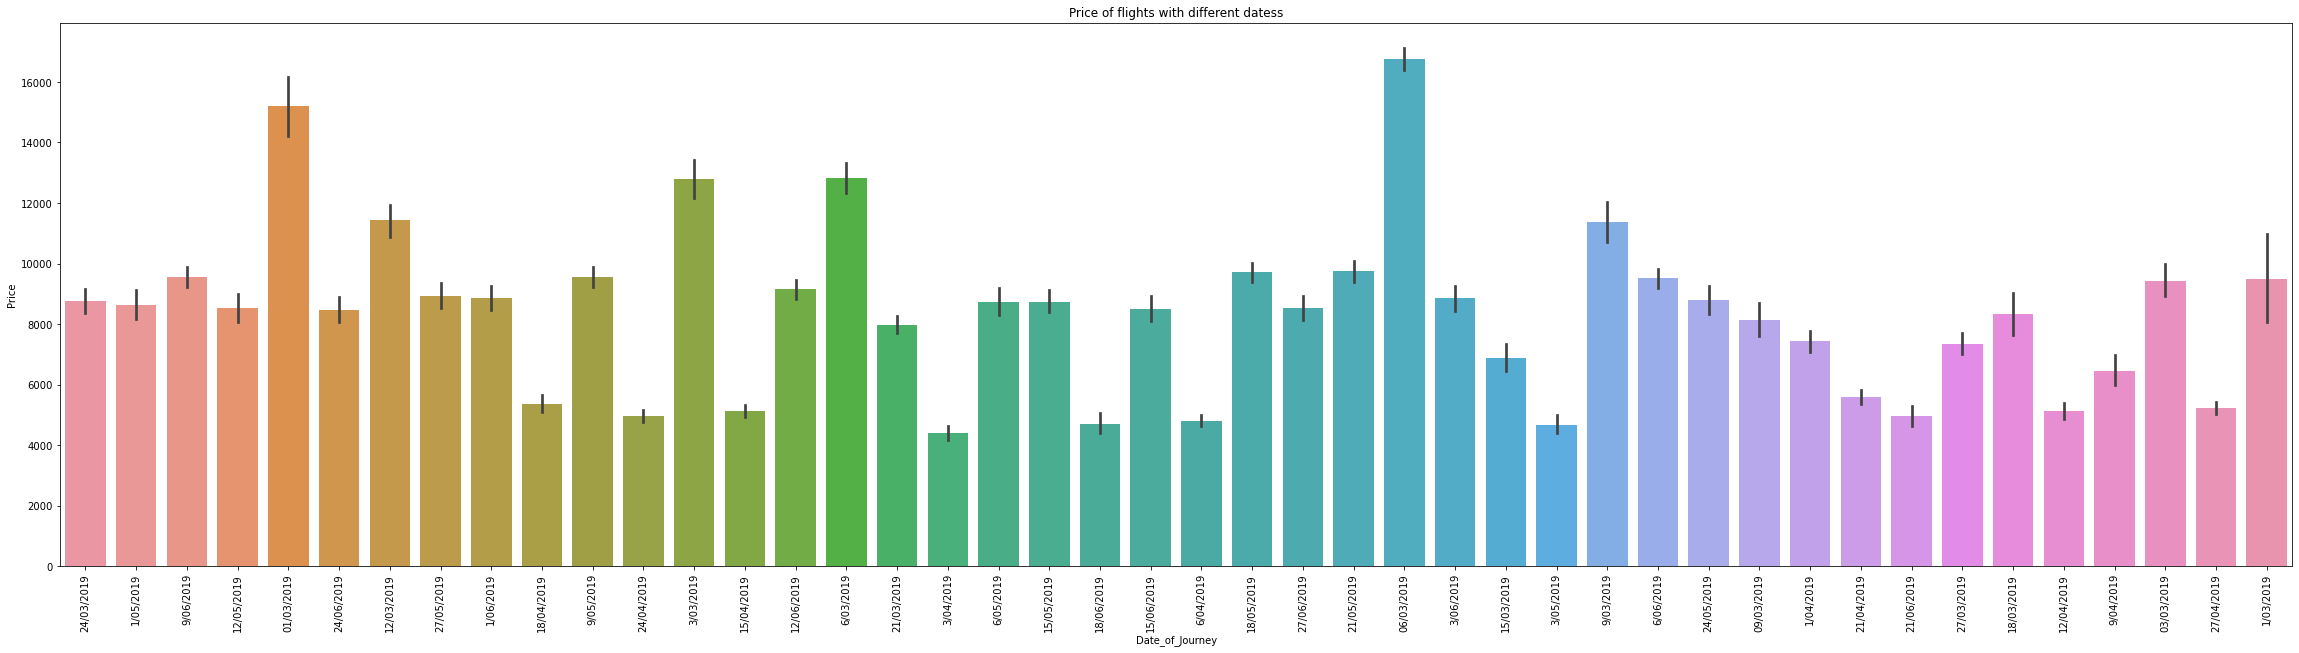

In [36]:
#Date_of_Journey v/s  price
plt.figure(figsize = (40, 10))
v5=sns.barplot(x='Date_of_Journey', y='Price', data=df)
v5.set_title('Price of flights with different datess')
v5.set_ylabel('Price')
v5.set_xlabel('Date_of_Journey')
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1080x432 with 0 Axes>

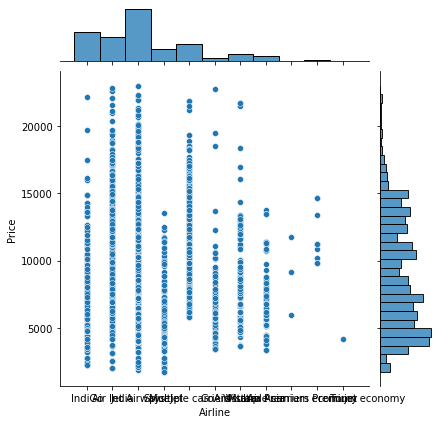

In [37]:
#Airline v/s price
plt.figure(figsize = (15, 6))
sns.jointplot(x='Airline',y='Price',data=df)
plt.xticks(rotation = 90)
plt.show

In [38]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# LabelEncoder

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
for x in df.columns:
    if x!= 'Price':
        df[x] = LabelEncoder().fit_transform(df[x])

In [41]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,230,240,4,5,3897
1,1,6,3,0,82,31,898,336,1,5,7662
2,4,43,2,1,116,70,409,106,1,5,13882
3,3,10,3,0,89,164,1310,311,0,5,6218
4,3,0,0,5,29,149,1225,303,0,5,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,62,183,1247,236,4,5,4107
10679,1,29,3,0,62,193,1292,237,4,5,4145
10680,4,29,0,2,18,58,816,280,4,5,7229
10681,9,0,0,5,18,92,930,238,4,5,12648


# Feature Selection

# Droping Constant Features Using Variance Threshold

In [42]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [43]:
df.columns[var_thres.get_support()]

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [44]:
df.shape

(10368, 11)

# Feature Selection- With Correlation

In [45]:
df.corr()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.014944,-0.013853,0.023310,0.002370,-0.018569,-0.016879,0.027431,0.037995,-0.108317,-0.026710
Date_of_Journey,0.014944,1.000000,0.149661,-0.250873,0.257569,-0.011117,-0.010311,-0.000430,-0.052247,-0.005269,0.019842
Source,-0.013853,0.149661,1.000000,-0.581120,0.384375,0.057423,0.022712,-0.195026,-0.233770,-0.036431,0.073826
Destination,0.023310,-0.250873,-0.581120,1.000000,-0.433271,-0.066174,-0.042090,0.018992,0.354053,0.046003,-0.166970
Route,0.002370,0.257569,0.384375,-0.433271,1.000000,-0.085590,0.018393,-0.054934,-0.448949,0.031258,0.240948
Dep_Time,-0.018569,-0.011117,0.057423,-0.066174,-0.085590,1.000000,-0.030878,0.041898,0.045662,-0.063272,-0.000834
Arrival_Time,-0.016879,-0.010311,0.022712,-0.042090,0.018393,-0.030878,1.000000,0.025699,-0.103350,0.013611,0.049222
Duration,0.027431,-0.000430,-0.195026,0.018992,-0.054934,0.041898,0.025699,1.000000,0.174272,0.075717,-0.165071
Total_Stops,0.037995,-0.052247,-0.233770,0.354053,-0.448949,0.045662,-0.103350,0.174272,1.000000,0.165082,-0.623468
Additional_Info,-0.108317,-0.005269,-0.036431,0.046003,0.031258,-0.063272,0.013611,0.075717,0.165082,1.000000,-0.045193


In [46]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [47]:
corr_features = correlation(df, 0.6)
len(set(corr_features))

1

In [48]:
corr_features

{'Price'}

In [49]:
# # As we need Description and Lp is needed for analysis, so we drop only Groupcode and Typecode
# df=df.drop('Description', axis=1)
# df=df.drop('Typecode', axis=1)
# df

# Information gain - mutual information In Regression

In [50]:
# split dep and indep
x_indep = df.drop('Price',axis=1)
x_indep

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,24,0,5,18,211,230,240,4,5
1,1,6,3,0,82,31,898,336,1,5
2,4,43,2,1,116,70,409,106,1,5
3,3,10,3,0,89,164,1310,311,0,5
4,3,0,0,5,29,149,1225,303,0,5
...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,62,183,1247,236,4,5
10679,1,29,3,0,62,193,1292,237,4,5
10680,4,29,0,2,18,58,816,280,4,5
10681,9,0,0,5,18,92,930,238,4,5


In [51]:
y_dep = df.Price
y_dep

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10368, dtype: int64

# Feature Importance

# Information gain - mutual information In Regression

In [52]:
## It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_indep,y_dep,
    test_size=0.2,
    random_state=0)

In [53]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.89193025, 0.20628682, 0.95601239, 0.73990701, 0.97914594,
       0.27991018, 0.38985556, 0.56989545, 0.54185542, 0.49375631])

In [54]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Route              0.979146
Source             0.956012
Airline            0.891930
Destination        0.739907
Duration           0.569895
Total_Stops        0.541855
Additional_Info    0.493756
Arrival_Time       0.389856
Dep_Time           0.279910
Date_of_Journey    0.206287
dtype: float64

<AxesSubplot:>

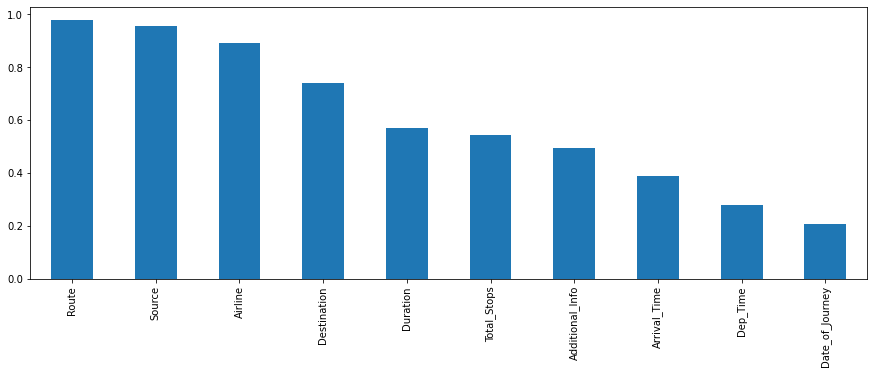

In [55]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [56]:
from sklearn.feature_selection import SelectPercentile

In [57]:
## Selecting the top 50 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=60)
selected_top_columns.fit(X_train, y_train)

SelectPercentile(percentile=60,
                 score_func=<function mutual_info_regression at 0x120efd440>)

In [58]:
selected_top_columns.get_support()

array([ True, False,  True,  True,  True, False, False,  True,  True,
       False])

In [59]:
X_train.columns[selected_top_columns.get_support()]

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops'], dtype='object')

In [60]:
df=df.drop(['Route'], axis=1) #we don't need it as we already have total_stops

In [61]:
# As we found in mutual_info_regression 70 percent of fields are considered for analysis, 
#as i feel droping only Duration and Arrival_Time will be helpful for analysis and 
# and with deployment point of view passengar does not need to set arrival time
#and for small destination flight passenger cannot choose different longer duration hours, so we drop both
df=df.drop('Duration', axis=1)
df=df.drop('Arrival_Time', axis=1)

In [62]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price
0,3,24,0,5,211,4,5,3897
1,1,6,3,0,31,1,5,7662
2,4,43,2,1,70,1,5,13882
3,3,10,3,0,164,0,5,6218
4,3,0,0,5,149,0,5,13302
...,...,...,...,...,...,...,...,...
10678,0,41,3,0,183,4,5,4107
10679,1,29,3,0,193,4,5,4145
10680,4,29,0,2,58,4,5,7229
10681,9,0,0,5,92,4,5,12648


# Gradient Boosting Regressor

In [104]:
from sklearn import preprocessing

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [107]:
gb = GradientBoostingRegressor()

In [108]:
gbm = GridSearchCV(gb,
                     param_grid = {'max_depth': range(8, 15),
                                  'min_samples_split': range(1, 11, 3)},
                     cv=5,
                     n_jobs=-1,
                     scoring='neg_mean_squared_error', refit=True,)
                      
gbm.fit(X_train, y_train)

print(gbm.best_params_)
print(-gbm.best_score_)

/Users/jeevitha_vignesh/opt/anaconda3/envs/tensor_flow_py/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [              nan -1820558.37222858 -1778852.56806246 -1798307.65198456
               nan -1844997.88336056 -1839631.94421212 -1802715.80192845
               nan -1962333.22107353 -1893737.93552859 -1861300.88957983
               nan -2058867.13714574 -1974882.65535375 -1945023.45533591
               nan -2180639.11921097 -2076582.11511056 -2006220.24281758
               nan -2299190.18776508 -2168571.73487592 -2091039.27583632
               nan -2450366.09558564 -2272255.70797894 -2177287.92215424]
  category=UserWarning


{'max_depth': 8, 'min_samples_split': 7}
1778852.5680624596


In [109]:
# Initiate the best model
model_GB = GradientBoostingRegressor(max_depth=8, min_samples_split=7)

In [110]:
X_train

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Additional_Info
5418,1,16,0,5,82,1,5
7918,4,31,2,1,46,0,5
1351,4,22,2,1,9,0,5
4606,0,23,0,2,88,4,5
8791,2,12,0,5,53,4,5
...,...,...,...,...,...,...,...
9474,5,31,2,1,105,0,2
4953,4,16,0,5,150,0,5
3326,1,39,3,0,98,0,5
10124,5,30,2,1,15,0,5


In [111]:
model_GBfit = model_GB.fit(X_train, y_train)

In [112]:
Predict_model1 = model_GBfit.predict(X_test)
Predict_model1

array([10549.38435414, 12457.93885717,  3758.22445447, ...,
       13089.46102544, 11587.18048977, 13599.46245807])

In [113]:
df1=pd.DataFrame({"actual:":y_test,"predicted":Predict_model1}).round()
df1

,actual:,predicted
9600,10262,10549.0
8099,12760,12458.0
4266,4284,3758.0
6321,17135,17706.0
1311,14178,13926.0
...,...,...
282,4030,5059.0
6013,4439,3943.0
7762,11542,13089.0
3813,7888,11587.0


In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
import math

In [116]:
Actual = y_test

In [117]:
gbm_r2 = r2_score(Actual,Predict_model1)
gbm_r2

0.9013975077338013

In [118]:
gbm_rmse=math.sqrt(mean_squared_error(Actual,Predict_model1))
gbm_rmse

1272.4842428933234

# eXtreme Gradient Boosting

In [119]:
from xgboost import XGBRegressor

In [120]:
xgb = XGBRegressor()

In [121]:
# best_xgb = GridSearchCV(xgb,
#                      param_grid = {'max_depth': range(7, 15),
#                                   'min_samples_split': range(1, 15)},
#                      cv=5,
#                      n_jobs=-1,
#                      scoring='neg_mean_squared_error',refit=True)
                      
# best_xgb.fit(X_train, y_train)

# print(best_xgb.best_params_)
# print(-best_xgb.best_score_)

In [122]:
# Initiate the best model
best_xgb = XGBRegressor(max_depth=9, min_samples_split=1)

In [123]:
model_xGBfit=best_xgb.fit(X_train, y_train)

[08:22:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [124]:
Predict_model2 = model_xGBfit.predict(X_test)

In [125]:
xgbm_r2 = r2_score(Actual,Predict_model2)
xgbm_r2

0.903381926335712

In [126]:
xgbm_rmse=math.sqrt(mean_squared_error(Actual,Predict_model2))
xgbm_rmse

1259.614508484763

# Decision Tree Regressor

In [127]:
from sklearn.tree import DecisionTreeRegressor

In [128]:
# Initiate the model
dt = DecisionTreeRegressor()

In [129]:
# Grid search
dt_gs = GridSearchCV(dt,param_grid = {'max_depth': range(1, 11),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=-1,
                     scoring='neg_mean_squared_error',refit=True)

In [130]:
dt_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_squared_error')

In [131]:
print(dt_gs.best_params_)
print(-dt_gs.best_score_)

{'max_depth': 10, 'min_samples_split': 10}
3045457.435581736


In [132]:
# Initiate the best model
dt_best_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10)

In [133]:
# Fit the best model
Decision_model_fit=dt_best_model.fit(X_train, y_train)

In [134]:
Predict_model3 = Decision_model_fit.predict(X_test)

In [190]:
dt_r2 = r2_score(Actual,Predict_model3)
dt_r2

0.837813515894131

In [191]:
dt_rmse=math.sqrt(mean_squared_error(Actual,Predict_model3))
dt_rmse

1631.9836244914025

# Random Forest Regressor

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
Random_model = RandomForestRegressor()

In [139]:
# Grid search
rf_gs = GridSearchCV(dt,param_grid = {'max_depth': range(1, 15),'min_samples_split': range(10, 60, 1),
                      "max_features" : ["auto", "log2", "sqrt"]},
                     cv=5,n_jobs=-1,
                     scoring='neg_mean_squared_error',refit=True)

In [140]:
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_split': range(10, 60)},
             scoring='neg_mean_squared_error')

In [141]:
print(rf_gs.best_params_)
print(-rf_gs.best_score_)

{'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 16}
2667126.5634866436


In [142]:
# Initiate the best model
rf_best_model = RandomForestRegressor(max_depth= 14, max_features= 'auto', min_samples_split= 17)

In [143]:
# Fit the best model
Random_model=rf_best_model.fit(X_train, y_train)

In [144]:
Random_model_fit = Random_model.fit(X_train, y_train)

In [145]:
Predict_model4 = Random_model_fit.predict(X_test)

In [146]:
rf_r2 = r2_score(Actual,Predict_model4)
rf_r2

0.8767986558305698

In [188]:
rf_rmse=math.sqrt(mean_squared_error(Actual,Predict_model4))
rf_rmse

1422.3818113684133

# Artificial Neural Network

In [148]:
from sklearn.preprocessing import scale

In [149]:
x_idep1=df.drop(["Price"], axis=1)

In [150]:
y_idep1=df.Price

In [151]:
x_idep1 = scale(x_idep1)
x_idep1



array([[-0.36428743,  0.01102565, -1.6668569 , ...,  1.69652415,
         1.38455378,  0.50646992],
       [-1.34658448, -1.45977501,  0.87660449, ..., -1.26360468,
        -0.25959392,  0.50646992],
       [ 0.12686109,  1.56353745,  0.02878403, ..., -0.62224343,
        -0.25959392,  0.50646992],
       ...,
       [ 0.12686109,  0.41958138, -1.6668569 , ..., -0.81958535,
         1.38455378,  0.50646992],
       [ 2.58260369, -1.9500419 , -1.6668569 , ..., -0.26044991,
         1.38455378,  0.50646992],
       [-1.34658448,  1.48182631,  0.02878403, ..., -0.37556603,
        -0.25959392,  0.50646992]])

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
xtrain, xtest, ytrain, ytest = train_test_split(x_idep1,y_idep1,test_size=0.2)

In [154]:
xtrain.shape, xtest.shape

((8294, 7), (2074, 7))

In [155]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [156]:
model1 = Sequential()

In [157]:
input_shape = xtrain[0].shape

In [158]:
model1.add(Dense(399,input_shape=input_shape))

In [159]:
model1.add(Dense(499,activation='relu'))

In [160]:
model1.add(Dense(599,activation='relu'))

In [161]:
model1.add(Dense(1,activation='relu'))

In [162]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 399)               3192      
_________________________________________________________________
dense_2 (Dense)              (None, 499)               199600    
_________________________________________________________________
dense_3 (Dense)              (None, 599)               299500    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 600       
Total params: 502,892
Trainable params: 502,892
Non-trainable params: 0
_________________________________________________________________


In [163]:
model1.compile(optimizer='adam',loss='mean_squared_error')

In [164]:
model1.fit(xtrain,ytrain,epochs=400)

Epoch 1/400
8294/8294 [==============================] - 16s 2ms/step - loss: 30979568.5511
Epoch 2/400
8294/8294 [==============================] - 15s 2ms/step - loss: 9966001.9682
Epoch 3/400
8294/8294 [==============================] - 15s 2ms/step - loss: 9726993.1125
Epoch 4/400
8294/8294 [==============================] - 15s 2ms/step - loss: 9564208.2035
Epoch 5/400
8294/8294 [==============================] - 15s 2ms/step - loss: 9522622.8406
Epoch 6/400
8294/8294 [==============================] - 15s 2ms/step - loss: 9517459.3852
Epoch 7/400
8294/8294 [==============================] - 15s 2ms/step - loss: 9450205.2153
Epoch 8/400
8294/8294 [==============================] - 15s 2ms/step - loss: 9458663.9460
Epoch 9/400
8294/8294 [==============================] - 15s 2ms/step - loss: 9412503.4306
Epoch 10/400
8294/8294 [==============================] - 15s 2ms/step - loss: 9420766.7879
Epoch 11/400
8294/8294 [==============================] - 15s 2ms/step - loss: 9405189.1

8294/8294 [==============================] - 16s 2ms/step - loss: 4047033.9474
Epoch 91/400
8294/8294 [==============================] - 16s 2ms/step - loss: 4020096.1565
Epoch 92/400
8294/8294 [==============================] - 16s 2ms/step - loss: 4068164.5875
Epoch 93/400
8294/8294 [==============================] - 16s 2ms/step - loss: 4000222.5494
Epoch 94/400
8294/8294 [==============================] - 16s 2ms/step - loss: 4032533.0621
Epoch 95/400
8294/8294 [==============================] - 16s 2ms/step - loss: 4038400.8926
Epoch 96/400
8294/8294 [==============================] - 16s 2ms/step - loss: 4038661.1459
Epoch 97/400
8294/8294 [==============================] - 16s 2ms/step - loss: 4020186.5453
Epoch 98/400
8294/8294 [==============================] - 16s 2ms/step - loss: 3954757.1463
Epoch 99/400
8294/8294 [==============================] - 16s 2ms/step - loss: 3963608.4748
Epoch 100/400
8294/8294 [==============================] - 16s 2ms/step - loss: 3964196.4594


8294/8294 [==============================] - 13s 2ms/step - loss: 3255760.5183
Epoch 266/400
8294/8294 [==============================] - 13s 2ms/step - loss: 3243223.2936
Epoch 267/400
8294/8294 [==============================] - 13s 2ms/step - loss: 3233631.5561
Epoch 268/400
8294/8294 [==============================] - 14s 2ms/step - loss: 3228539.5487
Epoch 269/400
8294/8294 [==============================] - 13s 2ms/step - loss: 3228578.0518
Epoch 270/400
8294/8294 [==============================] - 14s 2ms/step - loss: 3266024.9617
Epoch 271/400
8294/8294 [==============================] - 14s 2ms/step - loss: 3258900.1551
Epoch 272/400
8294/8294 [==============================] - 14s 2ms/step - loss: 3248522.4483
Epoch 273/400
8294/8294 [==============================] - 14s 2ms/step - loss: 3216765.0023
Epoch 274/400
8294/8294 [==============================] - 14s 2ms/step - loss: 3296220.8669
Epoch 275/400
8294/8294 [==============================] - 14s 2ms/step - loss: 3227

In [165]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [166]:
model1.predict(xtest)

array([[12983.311],
       [11578.917],
       [11183.816],
       ...,
       [14597.774],
       [ 7736.518],
       [ 4132.896]], dtype=float32)

In [167]:
mean_absolute_error(ytest,model1.predict(xtest))

1305.957789333715

In [168]:
ann_r2 = r2_score(ytest,model1.predict(xtest))
ann_r2

0.7963019338617898

In [169]:
ann_rmse = math.sqrt(mean_squared_error(ytest,model1.predict(xtest)))
ann_rmse

1816.210054467495

In [170]:
import gradio as gd

In [173]:
test=pd.read_excel("Flight_Test.xlsx")

In [175]:
test

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,non-stop,No info
...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,20:30,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,14:20,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,21:50,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,04:00,1 stop,No info


In [176]:
Airline = gd.inputs.Dropdown(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'],label='Airline')

In [177]:
Source = gd.inputs.Dropdown(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai']
                            ,label='Source')

In [178]:
Destination = gd.inputs.Dropdown(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata']
                                 ,label='Destination')

In [179]:
Dep_Time = gd.inputs.Dropdown(['17:30', '06:20', '19:15', '08:00', '23:55', '18:15', '07:30',
       '15:15', '10:10', '16:30', '13:55', '06:50', '09:00', '05:45',
       '21:25', '13:15', '09:55', '22:55', '10:45', '20:00', '05:30',
       '21:05', '16:00', '14:00', '22:50', '19:50', '07:10', '05:55',
       '16:55', '18:55', '10:20', '17:10', '13:00', '22:45', '21:00',
       '17:45', '09:25', '14:05', '09:45', '02:00', '11:40', '17:00',
       '06:00', '07:05', '16:45', '19:40', '03:50', '21:15', '11:30',
       '12:00', '21:50', '05:50', '07:55', '09:10', '08:20', '09:30',
       '10:00', '14:55', '22:10', '07:00', '19:55', '19:30', '15:00',
       '05:35', '06:40', '17:15', '21:20', '07:35', '06:55', '17:35',
       '11:15', '20:15', '20:25', '05:40', '15:05', '20:55', '14:25',
       '19:45', '08:25', '22:00', '21:10', '02:15', '08:30', '20:40',
       '14:15', '14:35', '11:10', '19:35', '15:20', '06:10', '22:20',
       '08:35', '14:40', '09:40', '01:30', '08:50', '19:05', '08:55',
       '11:35', '04:55', '14:10', '09:35', '17:50', '15:45', '02:55',
       '00:30', '19:00', '23:05', '11:25', '05:25', '05:15', '12:50',
       '06:45', '18:05', '13:25', '09:20', '02:30', '23:30', '07:45',
       '11:55', '20:20', '08:15', '17:25', '09:50', '15:50', '10:35',
       '14:30', '06:30', '11:50', '19:10', '20:45', '15:10', '16:50',
       '16:35', '10:30', '04:45', '04:00', '04:40', '18:25', '15:35',
       '19:20', '13:10', '13:05', '09:15', '20:30', '12:30', '11:00',
       '08:45', '07:20', '14:45', '10:55', '05:00', '15:55', '15:30',
       '20:05', '18:45', '16:10', '23:25', '16:40', '07:15', '13:20',
       '06:05', '20:50', '11:20', '06:15', '18:00', '18:40', '12:55',
       '05:10', '22:05', '07:25', '05:05', '22:30', '04:50', '18:20',
       '17:40', '00:40', '11:45', '22:15', '15:40', '14:20', '20:35',
       '13:30', '02:35', '17:05', '17:55', '21:30', '22:40', '08:10',
       '06:25', '20:10', '18:35', '13:50', '00:25', '01:35', '16:15',
       '10:25', '12:10', '23:00'],label='Additional Info')

In [180]:
Additional_Info = gd.inputs.Dropdown(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'],label='Departure Time')

In [181]:
Total_Stops = gd.inputs.Dropdown(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],label='Stop')

In [182]:
Date_of_Journey = gd.inputs.Dropdown(['6/06/2019', '12/05/2019', '21/05/2019', '24/06/2019',
       '12/06/2019', '12/03/2019', '1/05/2019', '15/03/2019',
       '18/05/2019', '21/03/2019', '15/06/2019', '15/05/2019',
       '3/06/2019', '06/03/2019', '24/03/2019', '6/03/2019', '9/05/2019',
       '18/03/2019', '6/04/2019', '1/06/2019', '3/03/2019', '27/03/2019',
       '9/06/2019', '3/05/2019', '1/04/2019', '18/06/2019', '15/04/2019',
       '6/05/2019', '9/03/2019', '3/04/2019', '27/06/2019', '21/06/2019',
       '21/04/2019', '18/04/2019', '9/04/2019', '24/05/2019',
       '01/03/2019', '09/03/2019', '27/05/2019', '03/03/2019',
       '27/04/2019', '1/03/2019', '24/04/2019', '12/04/2019'],
                                     label='Date of Journey')

In [183]:
X_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Total_Stops', 'Additional_Info'],
      dtype='object')

In [184]:
def mod(Airline,Date_of_Journey, Source, Destination, Dep_Time,Total_Stops,Additional_Info):
    x1 = [Airline,Date_of_Journey, Source, Destination, Dep_Time,Total_Stops,Additional_Info]
    test=pd.read_excel("Flight_Test.xlsx")
    test=test.drop(['Duration'],axis=1)
    test=test.drop(['Arrival_Time'],axis=1)
    test=test.drop(['Route'],axis=1)
    x1 =pd.DataFrame(np.array(x1).reshape(1,-1),columns=test.columns)
    test = test.append(x1,ignore_index = True)
    for x in test.columns:
        test[x] = LabelEncoder().fit_transform(test[x])
    x2 = test.iloc[-1,:]
    pred =  model_GBfit.predict(np.array(x2).reshape(1,-1))
    return pred


In [185]:
gd.Interface(mod, [Airline, Source, Destination, Date_of_Journey,Dep_Time,Total_Stops,Additional_Info],
             gd.outputs.Textbox(label='Price')).launch()

Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)

# Conclusion

In [201]:
G_B_R = {'R2':gbm_r2,'RMSE':gbm_rmse}
e_G_B = {'R2':xgbm_r2,'RMSE':xgbm_rmse}
R_f  = {'R2':rf_r2,'RMSE':rf_rmse}
D_t = {'R2':dt_r2,'RMSE':dt_rmse}
ANN = {'R2':ann_r2,'RMSE':ann_rmse}

In [202]:
DataFrame = pd.DataFrame(data=[G_B_R,e_G_B,R_f,D_t,ANN],index=["Gradient Boosting Regressor","eXtreme Gradient Boosting Regressor","Random forest Regressor ",
                                                                 "Decision Tree Regressor","Artifical Neural Network"])
# pd.options.display.precision = 2
DataFrame

,R2,RMSE
Gradient Boosting Regressor,0.901398,1272.484243
eXtreme Gradient Boosting Regressor,0.903382,1631.983624
Random forest Regressor,0.876799,1422.381811
Decision Tree Regressor,0.837814,1631.983624
Artifical Neural Network,0.796302,1816.210054
